In [18]:
import os
import tensorflow as tf
import pandas as pd
from joblib import load

In [19]:
ARTIFACTS_DIR = "../artifacts"

In [20]:
(
    _X_train, _X_val, X_test,
    _y_train, _y_val, y_test,
    classes
) = load(os.path.join(ARTIFACTS_DIR, "images_tuple.joblib"))

In [24]:
model_files = [
    f for f in os.listdir(ARTIFACTS_DIR)
    if f.startswith("best_cnn_") and f.endswith(".keras")
]

results = []
for file in sorted(model_files):
    path = os.path.join(ARTIFACTS_DIR, file)
    print(f"Evaluating {file} ...")
    model = tf.keras.models.load_model(path)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    results.append((file.replace(".keras", ""), acc, loss))

Evaluating best_cnn_baseline.keras ...
Evaluating best_cnn_batchnorm.keras ...
Evaluating best_cnn_data_augmentation.keras ...
Evaluating best_cnn_dropout.keras ...
Evaluating best_cnn_dropout_v2.keras ...
Evaluating best_cnn_pooling.keras ...


In [25]:
df = pd.DataFrame(results, columns=["Model", "Test Accuracy", "Test Loss"])
df = df.sort_values("Test Accuracy", ascending=False).reset_index(drop=True)
df

,Model,Test Accuracy,Test Loss
0,best_cnn_pooling,0.937500,0.269856
1,best_cnn_batchnorm,0.914062,0.435172
2,best_cnn_dropout_v2,0.890625,0.324246
3,best_cnn_baseline,0.867188,0.552192
4,best_cnn_dropout,0.835938,0.511460
5,best_cnn_data_augmentation,0.796875,0.715504


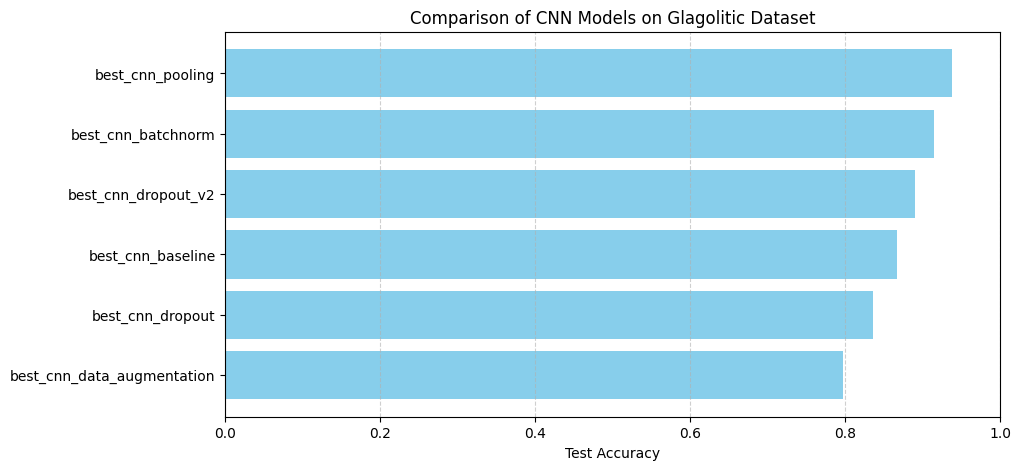

In [26]:
plt.figure(figsize=(10,5))

plt.barh(df["Model"], df["Test Accuracy"], color="skyblue")
plt.xlabel("Test Accuracy")
plt.title("Comparison of CNN Models on Glagolitic Dataset")
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()

In [27]:
best_model_name = df.loc[0, "Model"]
best_model_path = os.path.join(ARTIFACTS_DIR, f"{best_model_name}.keras")

print(f"Best model: {best_model_name}")
model = tf.keras.models.load_model(best_model_path)

Best model: best_cnn_pooling


Reloaded model accuracy: 0.9375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


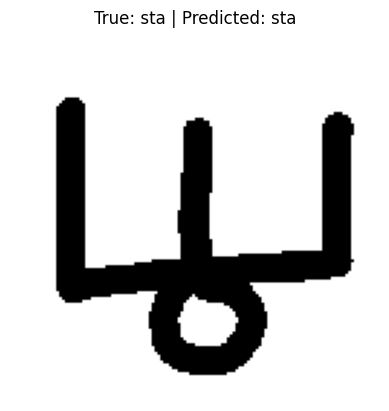

In [28]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Reloaded model accuracy: {acc:.4f}")

idx = np.random.randint(0, len(X_test))
pred = model.predict(X_test[idx:idx+1])
pred_label = classes[np.argmax(pred)]
true_label = classes[np.argmax(y_test[idx])]

plt.imshow(X_test[idx])
plt.axis("off")
plt.title(f"True: {true_label} | Predicted: {pred_label}")
plt.show()